# BBC News Articles

## Task 1: Exploratory Data Analytics
###### (a) Load the dataset and construct a feature vector for each article in the. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.
###### (b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii) class distribution.

Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import random
import matplotlib.pyplot as plt

Import Data

In [2]:
trainDF = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
testDF = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)

Vectorize Data

In [3]:
articles_text = trainDF["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1_sample = vectorizer1_sample.transform(random_sample)

# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1.toarray()}')
print(f'\narticle vector (5 articles)\n {vector1_sample.toarray()}')

## APPROACH TWO ##
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(articles_text)

vectorizer2_sample = TfidfVectorizer()
vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
vector2 = vectorizer2.transform(articles_text)
vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
print('\n', "Method 2")
print(f'article vector\n {vector2.toarray()}')
print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

article vector (5 articles)
 [[0 0 0 ... 0 2 0]
 [0 0 1 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 1 1 0]]

 Method 2
article vector
 [[0.         0.02011467 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

article vector (5 articles)
 [[0.         0.         0.         ... 0.         0.04364651 0.        ]
 [0.         0.         0.04813166 ... 0.         0.03223433 0.04813166]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.     

# Task 3

Use this code for Task 3(a). 

In [4]:
from math import floor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

m = [0.1, 0.3, 0.5, 0.7, 0.9]
training_output = pd.DataFrame(columns=m)
testing_output = pd.DataFrame(columns=m)

NUM_ARTICLES = vector1.shape[0]

# LOGISTIC REGRESSION
training_accuracies = {}
testing_accuracies = {}

# Transform the data into a format that can be used by the classifier
text_transformer = TfidfVectorizer()
X_train_text = text_transformer.fit_transform(trainDF['Text'])
X_test_text = text_transformer.transform(testDF['Text'])

for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    # Test how differing sizes of training set data affect test/train accuracy
    X_train = X_train_text[0:TRAIN_LENGTH]  # First TRAIN_LENGTH articles
    Y_train = trainDF['Category'][0:TRAIN_LENGTH] # First TRAIN_LENGTH categories

    # Test Data Unchanged
    X_test = X_test_text    # All test data text
    Y_test = testDF['Category'] # All test data categories

    # Train & Fit LR Model
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=m_value, multi_class='multinomial')
    logreg.fit(X_train, Y_train)

    F1_train_score = metrics.f1_score(Y_train, logreg.predict(X_train), pos_label = "tech")
    F1_test_score = metrics.f1_score(Y_test, logreg.predict(X_test), pos_label = "tech")

    # LR Model Accuracies
    training_accuracies[m_value] = F1_train_score
    testing_accuracies[m_value] = F1_test_score

training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['LR'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['LR'])])

# NAIVE BAYES
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray() # change this to vector 2 if needed
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    NB_clf = MultinomialNB()
    NB_clf.fit(X_train, Y_train)

    # put your accuracy calc here
    Y_train_pred = NB_clf.predict(X_train)
    Y_pred = NB_clf.predict(X_test)
    training_accuracies[m_value] = metrics.f1_score(Y_train, Y_train_pred, pos_label = "tech")
    testing_accuracies[m_value] = metrics.f1_score(Y_test, Y_pred, pos_label = "tech")
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NB'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NB'])])

# SVM
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray()
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    SVM_clf = svm.SVC(kernel='rbf', C=10**10, gamma=10**-3)
    SVM_clf.fit(X_train, Y_train)
    
    # put your accuracy calc here
    Y_train_pred = SVM_clf.predict(X_train)
    Y_pred = SVM_clf.predict(X_test)
    training_accuracies[m_value] = metrics.f1_score(Y_train, Y_train_pred, pos_label = "tech")
    testing_accuracies[m_value] = metrics.f1_score(Y_test, Y_pred, pos_label = "tech")
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['SVM'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['SVM'])])

# Not Nearest Neighbour (lol)
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1.toarray() # change this to vector 2 if needed
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here

    # put your accuracy calc here
    training_accuracies[m_value] = 0
    testing_accuracies[m_value] = 0
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NN'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NN'])])

pd.merge(training_output, testing_output, left_index=True, right_index=True, suffixes=('_train', '_test'))

,0.1_train,0.3_train,0.5_train,0.7_train,0.9_train,0.1_test,0.3_test,0.5_test,0.7_test,0.9_test
LR,0.746269,0.99187,0.995434,0.996785,0.997403,0.596026,0.977273,0.988764,0.989011,0.989011
NB,1.0,1.0,0.995434,0.996785,0.994819,0.884259,0.984026,0.985915,0.991736,1.0
SVM,1.0,1.0,1.0,1.0,1.0,0.910941,0.953947,0.976526,0.975207,0.978723
NN,0,0,0,0,0,0,0,0,0,0


### Plotting these

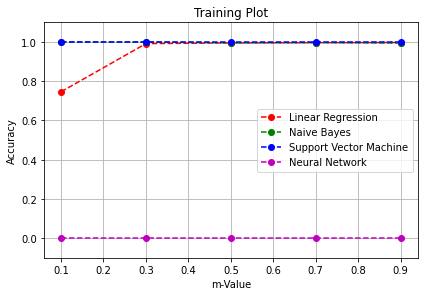

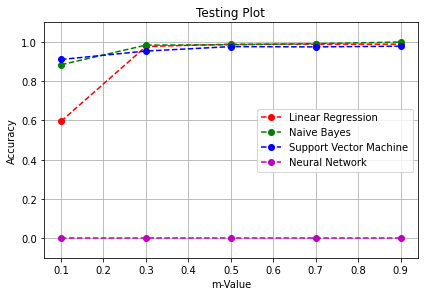

In [11]:
#Training Plot

plt.plot(m, training_output.iloc[0].to_numpy(), '--ro', label='Linear Regression')
plt.plot(m, training_output.iloc[1].to_numpy(), '--go', label='Naive Bayes')
plt.plot(m, training_output.iloc[2].to_numpy(), '--bo', label='Support Vector Machine')
plt.plot(m, training_output.iloc[3].to_numpy(), '--mo', label='Neural Network')

plt.legend()
plt.xlabel("m-Value")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.1]) # WE CAN ZOOM IN LATER
plt.grid()
plt.tight_layout()
plt.title("Training Plot")
plt.show()

#Testing Plot

plt.plot(m, testing_output.iloc[0].to_numpy(), '--ro', label='Linear Regression')
plt.plot(m, testing_output.iloc[1].to_numpy(), '--go', label='Naive Bayes')
plt.plot(m, testing_output.iloc[2].to_numpy(), '--bo', label='Support Vector Machine')
plt.plot(m, testing_output.iloc[3].to_numpy(), '--mo', label='Neural Network')

plt.legend()
plt.xlabel("m-Value")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.1]) # WE CAN ZOOM IN LATER
plt.grid()
plt.tight_layout()
plt.title("Testing Plot")
plt.show()

# Task 5(b)
5-fold cross-validation to assess model performance